In [ ]:
import torch
import numpy as np
import pandas as pd
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

sdf = pd.read_csv('../data/sample_data.csv', index_col = 0)

In [ ]:
ndt = np.array(sdf)
dt = 100*(np.log(ndt[1:,:])-np.log(ndt[:-1,:]))
dt = pd.DataFrame(dt, index=sdf.iloc[1:,:].index, columns=sdf.columns.str[:-6])
display(dt)

,AAPL,ABC,ABIO,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,...,WM,WMB,WMT,WY,XEL,XOM,XRAY,XRX,YUM,ZION
2002/4/2,-1.607440,-0.521959,-2.672306,-4.842094,-5.433252,-0.071055,-0.965385,-2.481649,0.071126,1.153808,...,-2.222292,1.752913,-1.063457,-0.857179,1.650298,1.247015,-0.575564,-3.489754,1.094754,-0.287957
2002/4/3,-1.338501,-1.745013,-13.353139,-0.077533,-2.796167,-2.373363,-3.044086,-4.439147,0.023701,-0.043299,...,-0.112374,-4.614558,-0.561517,0.275740,0.233571,-1.566944,-1.050065,-0.093503,-0.974458,-1.728488
2002/4/4,4.728711,-0.103632,-2.409755,-0.935316,1.151158,3.010988,0.000000,0.436832,0.354836,2.078727,...,-0.150096,-0.564917,1.153726,-1.222177,0.531260,-1.243680,2.170728,1.208770,0.496927,-1.355625
2002/4/5,-0.644705,-2.185677,-0.244197,-1.155188,-0.187008,-0.993623,0.362955,-1.293022,-0.426011,-0.702365,...,-1.399196,-2.514956,-0.236445,1.448735,-2.021939,-1.212426,-0.272157,-2.811821,1.105009,0.314460
2002/4/8,-0.730297,1.546915,2.415576,2.580626,0.116990,1.627197,1.313791,1.224163,0.685346,0.638722,...,0.076111,0.223107,1.076343,-0.778766,-0.361035,1.420770,4.137757,-1.147248,1.426818,0.833764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023/3/24,0.827129,3.566468,2.433210,1.602269,-0.933345,1.950772,0.238462,-0.458441,4.167016,4.218381,...,2.464412,1.542811,0.814314,0.844488,3.476995,0.115971,1.324167,0.479612,0.117414,2.872725
2023/3/27,-1.236949,0.178855,-0.481929,-0.483886,-1.567985,1.477092,0.107352,-0.736901,-0.059517,-0.607965,...,-0.571359,0.658924,1.657551,0.559051,-0.397436,2.168913,0.748857,2.564244,0.359200,3.751743
2023/3/28,-0.398826,0.832569,-1.951281,0.066975,-0.635232,1.023685,-0.098017,-0.747438,0.688187,0.428215,...,0.804158,-0.207609,-0.389185,-0.980403,0.168339,1.239918,0.584490,-2.427633,0.163563,2.091847
2023/3/29,1.959745,0.612048,-0.990107,1.530808,2.988656,0.558583,2.649619,0.953517,1.688400,1.307060,...,1.423731,1.376007,0.430792,2.261359,1.728100,1.703110,-0.079489,1.624955,-0.070060,3.574737


In [ ]:
dt = dt.replace(0, 1e-5)

In [ ]:
x_data_raw = dt.loc['2002/11/26':'2023/3/29'].to_numpy()

In [ ]:
x_train_2d = torch.from_numpy(x_data_raw[:3800]).float()
r = torch.corrcoef(x_train_2d.T)
d = torch.sqrt(2*(1-r))
W2 = 1/d
for k in range(331):
    W2[k,k] = 0

In [ ]:
colname = [name for name in dt.columns.tolist()]
W_pd = pd.DataFrame(W2, columns=colname, index=colname)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  2.,  8., 58., 55., 89., 63., 34.,
        20.]),
 array([0.        , 0.02363655, 0.04727311, 0.07090966, 0.09454621,
        0.11818276, 0.14181931, 0.16545586, 0.18909243, 0.21272898,
        0.23636553, 0.26000208, 0.28363863, 0.30727518, 0.33091173,
        0.35454828, 0.37818485, 0.4018214 , 0.42545795, 0.4490945 ,
        0.47273105, 0.4963676 , 0.52000415, 0.54364073, 0.56727725,
        0.59091383, 0.61455035, 0.63818693, 0.66182345, 0.68546003,
        0.70909655, 0.73273313, 0.75636971, 0.78000623, 0.80364281,
        0.82727933, 0.85091591, 0.87455243, 0.89818901, 0.92182553,
        0.94546211]),
 <BarContainer object of 40 artists>)

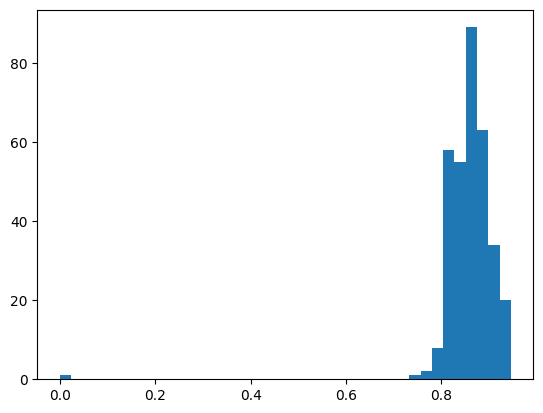

In [ ]:
import matplotlib.pyplot as plt

plt.hist(W_pd.iloc[0], bins=40)

In [ ]:
def mask_top_n(df, n):
    # 各行の値の順位を計算（降順）
    ranks = df.apply(lambda x: x.rank(method='min', ascending=False), axis=1)
    # top N の条件に該当する位置は元の値を保持し、それ以外は 0
    return df.where(ranks <= n, 0)

In [ ]:
W_pd = mask_top_n(W_pd, 10)

In [ ]:
# Tech
threshold = 0.00
tech_list = [
    'AAPL',
    'ADBE',
    'ADI',
    'ADSK',
    'AMAT',
    'AMD',
    'ANSS',
    'AKAM',
    'CSCO',
    'MSFT',
    'ORCL',
    'TXN',
    'NVDA',
    'AMZN'
]

soft_list = [
    'ADBE',
    'ADSK',
    'ANSS',
    'CSCO',
    'ORCL',
]

semc_list = [
    'ADI',
    'AMAT',
    'AMD',
    'TXN',
    'NVDA'
]

W_tech = W_pd.loc[tech_list, tech_list]
W_tech = W_tech*(W_tech>threshold)
W_tech

,AAPL,ADBE,ADI,ADSK,AMAT,AMD,ANSS,AKAM,CSCO,MSFT,ORCL,TXN,NVDA,AMZN
AAPL,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.938260,0.000000,0.929700,0.000000,0.000000,0.0
ADBE,0.0,0.000000,0.000000,1.021797,0.000000,0.0,0.0,0.0,0.000000,1.016099,1.009356,0.000000,0.000000,0.0
ADI,0.0,0.000000,0.000000,0.000000,1.231812,0.0,0.0,0.0,1.050722,0.000000,0.000000,1.382813,1.068359,0.0
ADSK,0.0,1.021797,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
AMAT,0.0,0.000000,1.231812,0.000000,0.000000,0.0,0.0,0.0,1.043391,0.000000,0.000000,1.221465,1.046906,0.0
AMD,0.0,0.000000,0.971596,0.000000,0.965770,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.971066,0.941189,0.0
ANSS,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
AKAM,0.0,0.000000,0.909947,0.000000,0.000000,0.0,0.0,0.0,0.917664,0.000000,0.000000,0.000000,0.000000,0.0
CSCO,0.0,0.000000,1.050722,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.058970,1.080761,1.049895,0.000000,0.0
MSFT,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.058970,0.000000,1.056626,0.000000,0.000000,0.0


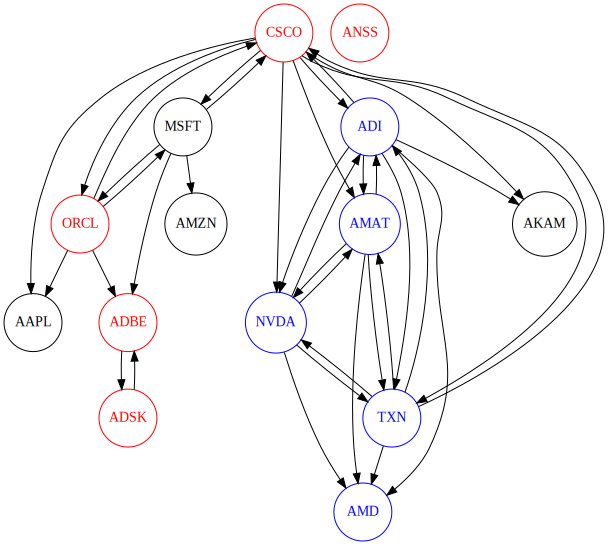

In [ ]:
from graphviz import Digraph

G = Digraph(format="png")
G.attr("node", shape="circle")
for node_name in tech_list:
    col = 'black'
    if node_name in soft_list:col='red'
    if node_name in semc_list:col='blue'
    G.node(node_name, width="0.8", color=col, fontcolor=col)
for r in tech_list:
    for c in tech_list:
        if W_tech.loc[r,c] != 0:
            col = 'black'
            G.edge(c,r, color=col, fontcolor=col)
G